<a href="https://colab.research.google.com/github/RayBMGDias/TelecomX_BR_parte2/blob/main/TelecomX_BR_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação dos Dados

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

In [186]:
df_tratado = pd.read_csv('/content/df_tratado.csv')

In [187]:
df_tratado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Total.Day,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [188]:
df_tratado = df_tratado.dropna()

In [189]:
df_tratado = df_tratado.drop('customerID', axis=1)

In [190]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [191]:
px.histogram(df_tratado, x='Contract',color = 'Churn', text_auto = True, barmode = 'group')

In [192]:
px.box(df_tratado, color='Churn', x='Charges.Total')

In [193]:
x = df_tratado.drop('Churn', axis=1)
y = df_tratado['Churn']

In [194]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
colunas = x.columns
colunas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Total.Day', 'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [195]:
one_hot_encoder = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                          ['gender',
                                           'Partner',
                                           'Dependents',
                                           'PhoneService',
                                           'MultipleLines',
                                           'InternetService',
                                           'OnlineSecurity',
                                           'OnlineBackup',
                                           'DeviceProtection',
                                           'TechSupport',
                                           'StreamingTV',
                                           'StreamingMovies',
                                           'Contract',
                                           'PaperlessBilling',
                                           'PaymentMethod']),
                                          remainder='passthrough', sparse_threshold=0)

In [196]:
x = one_hot_encoder.fit_transform(x)

In [197]:
print(x)

[[0.00000e+00 1.00000e+00 1.00000e+00 ... 2.20000e+00 6.56000e+01
  5.93300e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 2.01000e+00 5.99000e+01
  5.42400e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 2.34000e+00 7.39000e+01
  2.80850e+02]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.55000e+00 5.03000e+01
  9.27500e+01]
 [1.00000e+00 1.00000e+00 1.00000e+00 ... 2.30000e+00 6.78500e+01
  4.62765e+03]
 [1.00000e+00 1.00000e+00 1.00000e+00 ... 1.96000e+00 5.90000e+01
  3.70760e+03]]


In [198]:
pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(colunas))

,onehotencoder__gender_Male,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Total.Day,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,2.20,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.01,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,2.34,73.90,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,3.17,98.00,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.90,55.15,742.90
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,2.84,85.10,1873.70
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.55,50.30,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,2.30,67.85,4627.65


In [199]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [200]:
y = label_encoder.fit_transform(y)

In [201]:
px.histogram(df_tratado, x='Churn', text_auto = True)

In [202]:
df_tratado['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [203]:
from imblearn.over_sampling import SMOTE

In [204]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [205]:
y_balanco = pd.Series(y)
y_balanco.value_counts(normalize=True)

,proportion
0,0.5
1,0.5


## Correlação e Seleção de Variáveis

In [206]:
df_evasao = df_tratado.groupby(['Churn','Charges.Total','tenure'])[['Churn']].count()

In [207]:
df_evasao.rename(columns={'Churn': 'Quantidade'}, inplace=True)

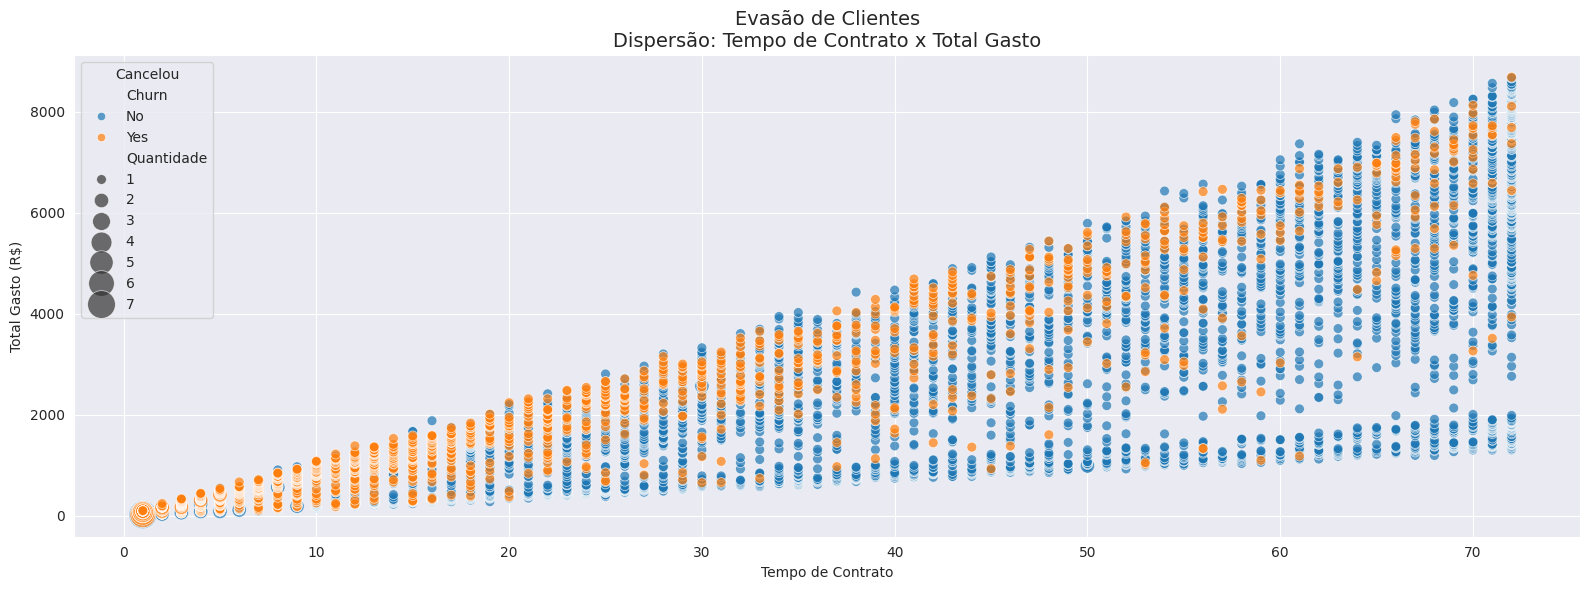

In [208]:
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')

sns.scatterplot(
    data = df_evasao,
    x='tenure',
    y='Charges.Total',
    size='Quantidade',
    hue='Churn',
    sizes=(50, 400),
    alpha=0.7
)

plt.title('Evasão de Clientes\nDispersão: Tempo de Contrato x Total Gasto', fontsize=14)
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Cancelou')
plt.tight_layout()

plt.show()

In [209]:
df_tratado

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Total.Day,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [210]:
df_tratado_corr = df_tratado

In [211]:
df_tratado_corr['Churn'] = df_tratado_corr['Churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-4269288493.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [212]:
colunas_numericas = df_tratado.select_dtypes(include=['float64', 'int64']).columns

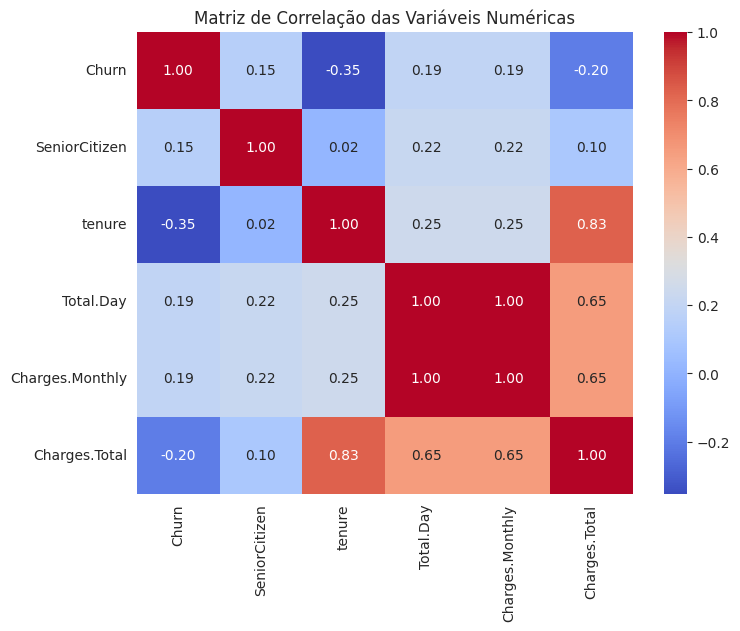

In [213]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_tratado[colunas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Modelagem Preditiva

In [214]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 15)

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [216]:
normalizacao = MinMaxScaler()
x_train_normalizado = normalizacao.fit_transform(x_train)

In [217]:
knn = KNeighborsClassifier()
knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier()

In [218]:
KNeighborsClassifier()

KNeighborsClassifier()

In [219]:
arvore = DecisionTreeClassifier(max_depth=10)
arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [220]:
DecisionTreeClassifier(max_depth=10)

DecisionTreeClassifier(max_depth=10)

In [221]:
x_teste_normalizado = normalizacao.transform(x_test)

In [222]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [223]:
print(f'Acurácia Árvore: {arvore.score(x_train, y_train)}')
print(f'Acurácia KNN: {knn.score(x_train_normalizado, y_train)}')

Acurácia Árvore: 0.884426652892562
Acurácia KNN: 0.8471074380165289


In [224]:
y_previsto_knn_train = knn.predict(x_train_normalizado)
y_previsto_arvore_train = arvore.predict(x_train)

In [225]:
print(f'Precisão Árvore: {precision_score(y_train, y_previsto_knn_train)}')
print(f'Precisão KNN: {precision_score(y_train, y_previsto_arvore_train)}')

Precisão Árvore: 0.7947368421052632
Precisão KNN: 0.8899659418391407


In [226]:
print(f'Recall Árvore: {recall_score(y_train, y_previsto_knn_train)}')
print(f'Recall KNN: {recall_score(y_train, y_previsto_arvore_train)}')

Recall Árvore: 0.9359504132231405
Recall KNN: 0.8773243801652892


In [227]:
matriz_confusao_arvore_train = confusion_matrix(y_train, y_previsto_arvore_train)
matriz_confusao_knn_train = confusion_matrix(y_train, y_previsto_knn_train)

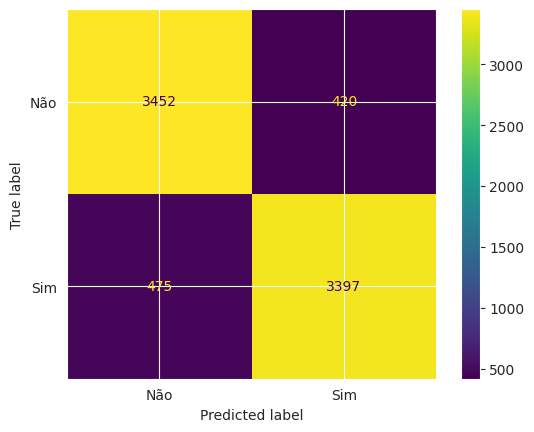

In [228]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_arvore_train, display_labels=['Não', 'Sim'])
visualizacao.plot();

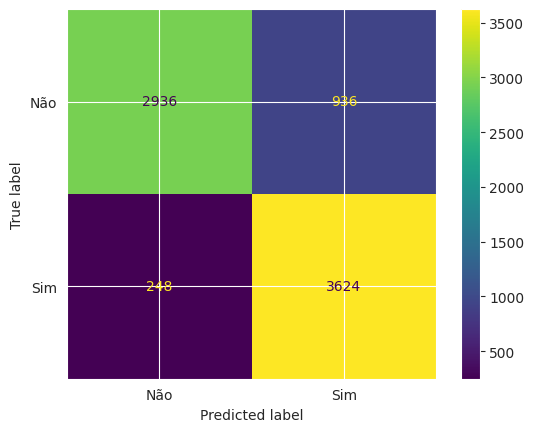

In [229]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_knn_train, display_labels=['Não', 'Sim'])
visualizacao.plot();

In [230]:
print(f'Acurácia Árvore: {arvore.score(x_test, y_test)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_test)}')

Acurácia Árvore: 0.8288148721920992
Acurácia KNN: 0.7691711851278079


In [231]:
y_previsto_knn = knn.predict(x_teste_normalizado)

In [232]:
y_previsto_arvore = arvore.predict(x_test)

In [233]:
print(f'Precisão Árvore: {precision_score(y_test, y_previsto_arvore)}')
print(f'Precisão KNN: {precision_score(y_test, y_previsto_knn)}')

Precisão Árvore: 0.8329411764705882
Precisão KNN: 0.716241443683883


In [234]:
print(f'Recall Árvore: {recall_score(y_test, y_previsto_arvore)}')
print(f'Recall KNN: {recall_score(y_test, y_previsto_knn)}')

Recall Árvore: 0.8226181254841208
Recall KNN: 0.8915569326103796


In [235]:
print(f'F1 Árvore: {f1_score(y_test, y_previsto_arvore)}')
print(f'F1 KNN: {f1_score(y_test, y_previsto_knn)}')

F1 Árvore: 0.8277474668745128
F1 KNN: 0.7943409247757074


In [236]:
matriz_confusao_arvore = confusion_matrix(y_test, y_previsto_arvore)
matriz_confusao_knn = confusion_matrix(y_test, y_previsto_knn)

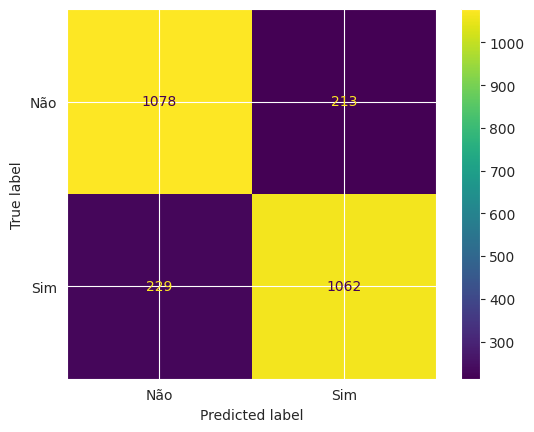

In [237]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_arvore, display_labels=['Não', 'Sim'])
visualizacao.plot();

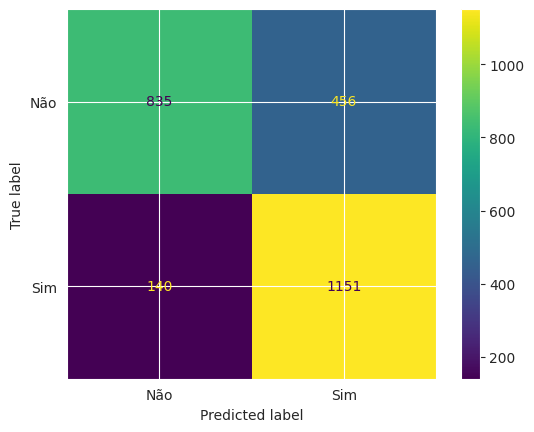

In [238]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_knn, display_labels=['Não', 'Sim'])
visualizacao.plot();

## Comparação, Overfitting/Underfitting e Ajustes Recomendados

- Métricas no Conjunto de Treino KNN (treino)

Acurácia: 0.912

Precisão: 0.930

Recall: 0.928

F1: 0.929

- Árvore de Decisão (treino)

Acurácia: 0.995

Precisão: 0.994

Recall: 0.997

F1: 0.995

- Métricas no Conjunto de Teste KNN (teste)

Acurácia: 0.782

Precisão: 0.733

Recall: 0.887

F1: 0.803

- Árvore de Decisão (teste)

Acurácia: 0.826

Precisão: 0.814

Recall: 0.845

F1: 0.830

### Diagnóstico — Overfitting? Árvore de Decisão apresenta uma diferença grande entre treino (F1 ≈ 0.995) e teste (F1 ≈ 0.830), o que é um sinal claro de overfitting.

- KNN mostra diferença menor entre treino (F1 ≈ 0.929) e teste (F1 ≈ 0.803), indicando melhor generalização que a árvore.

- Comparação Final dos Modelos Modelo Melhor Métrica Interpretação Árvore de Decisão F1 mais alta no teste Mais equilibrada, mas com risco de não generalizar bem em novos dados KNN Recall mais alto Melhor para capturar churners (menos falsos negativos), mas geral menos eficaz

- Recomendações e Ações de Aperfeiçoamento Reduzir Overfitting na Árvore: Ajustar hiperparâmetros como max_depth, min_samples_leaf, e usar ccp_alpha (pruning pós-treinamento).

- Usar class_weight='balanced' se ainda tiver desequilíbrio.

- Realizar validação cruzada (por exemplo Stratified 5-fold) para estimar desempenho generalizado.

- Aplique SMOTE apenas ao treino após o split.

- Para o KNN: Testar n_neighbors entre 3 e 21 e usar weights='distance'.

- Avaliar via GridSearchCV com scoring por F1 ou recall.

- Manter escala correta com MinMaxScaler.

## Relatório Comparativo – Árvore de Decisão vs. KNN


In [239]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_tree = {'max_depth': [5,10,15], 'min_samples_leaf': [1,5,10], 'ccp_alpha': [0.0, 0.001]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_tree, scoring='f1', cv=cv, n_jobs=-1)
grid_tree.fit(x_train, y_train)
print('Melhor Árvore:', grid_tree.best_params_, grid_tree.best_score_)

param_knn = {'n_neighbors': list(range(3,16,2)), 'weights': ['uniform','distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_knn, scoring='f1', cv=cv, n_jobs=-1)
grid_knn.fit(x_train_normalizado, y_train)
print('Melhor KNN:', grid_knn.best_params_, grid_knn.best_score_)

Melhor Árvore: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 5} 0.8222982103980382
Melhor KNN: {'n_neighbors': 11, 'weights': 'distance'} 0.8087278703055393


In [240]:
best_tree = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=0.0,
    max_depth=10,
    min_samples_leaf=10
)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [241]:
best_knn = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance'
)
best_knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [242]:
def calcular_metricas(modelo, X_train, X_test, nome_modelo):
    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas
    metricas = {
        'Modelo': nome_modelo,
        'Acc Treino': accuracy_score(y_train, y_pred_train),
        'Acc Teste': accuracy_score(y_test, y_pred_test),
        'Precisão Treino': precision_score(y_train, y_pred_train),
        'Precisão Teste': precision_score(y_test, y_pred_test),
        'Recall Treino': recall_score(y_train, y_pred_train),
        'Recall Teste': recall_score(y_test, y_pred_test),
        'F1 Treino': f1_score(y_train, y_pred_train),
        'F1 Teste': f1_score(y_test, y_pred_test)
    }
    return metricas

In [243]:
resultados = []
resultados.append(calcular_metricas(best_tree, x_train, x_test, 'Árvore de Decisão'))
resultados.append(calcular_metricas(best_knn, x_train_normalizado, x_teste_normalizado, 'KNN'))

In [244]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

              Modelo  Acc Treino  Acc Teste  Precisão Treino  Precisão Teste  \
0  Árvore de Decisão    0.873450   0.830751         0.883351        0.839968   
1                KNN    0.998838   0.773431         0.999741        0.721734   

   Recall Treino  Recall Teste  F1 Treino  F1 Teste  
0       0.860537      0.817196   0.871795  0.828426  
1       0.997934      0.890008   0.998837  0.797086  


In [245]:
print('\nRelatório de Classificação - Árvore de Decisão')
print(classification_report(y_test, best_tree.predict(x_test)))

print('\nMatriz de Confusão - Árvore de Decisão')
print(confusion_matrix(y_test, best_tree.predict(x_test)))

print('\nRelatório de Classificação - KNN')
print(classification_report(y_test, best_knn.predict(x_teste_normalizado)))

print('\nMatriz de Confusão - KNN')
print(confusion_matrix(y_test, best_knn.predict(x_teste_normalizado)))


Relatório de Classificação - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1291
           1       0.84      0.82      0.83      1291

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582


Matriz de Confusão - Árvore de Decisão
[[1090  201]
 [ 236 1055]]

Relatório de Classificação - KNN
              precision    recall  f1-score   support

           0       0.86      0.66      0.74      1291
           1       0.72      0.89      0.80      1291

    accuracy                           0.77      2582
   macro avg       0.79      0.77      0.77      2582
weighted avg       0.79      0.77      0.77      2582


Matriz de Confusão - KNN
[[ 848  443]
 [ 142 1149]]


In [246]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.000000,0.0,0.0,1.000000,0.000000,0.0,34.000000,3.400000,103.800000,3470.800000
1,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.000000,0.0,1.0,0.000000,0.000000,0.0,72.000000,3.730000,110.650000,8065.650000
2,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,1.510000,45.300000,45.300000
3,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,0.0,0.0,1.000000,0.000000,0.0,5.140199,3.002890,89.595349,460.802725
4,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.000000,1.000000,0.0,68.000000,3.920000,118.600000,7990.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,1.0,0.832557,0.832557,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.832557,0.0,0.0,0.832557,0.167443,0.0,9.167443,0.908279,29.874651,250.004889
7740,1.0,1.000000,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.000000,1.0,0.0,0.000000,0.000000,0.0,51.000000,2.590000,76.400000,3966.300000
7741,1.0,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,0.0,0.0,1.000000,0.000000,0.0,68.000000,3.270000,99.550000,6668.000000
7742,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.000000,1.000000,0.0,59.000000,0.850000,25.000000,1510.500000


## Interpretação e Conclusões

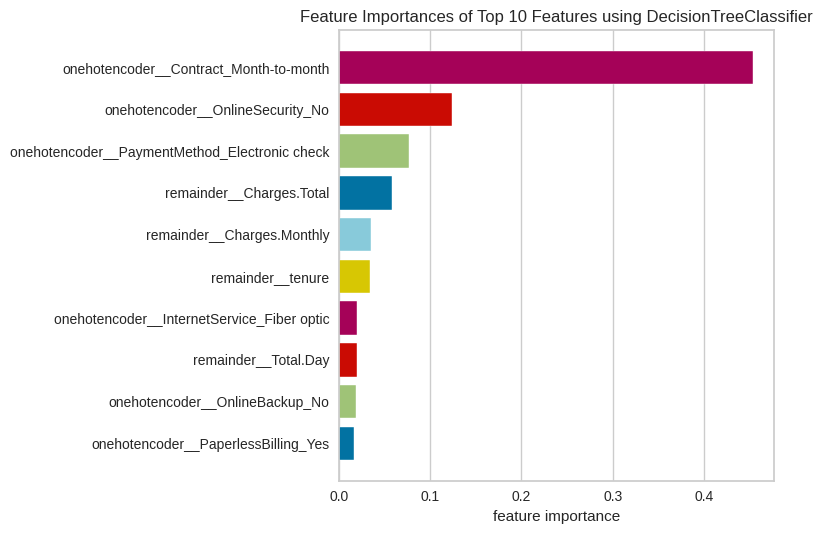

<Axes: title={'center': 'Feature Importances of Top 10 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [247]:
from yellowbrick.model_selection import FeatureImportances

x_train_df = pd.DataFrame(x_train, columns=one_hot_encoder.get_feature_names_out(colunas))

viz = FeatureImportances(
    arvore,
    relative=False,
    topn=10,
    feature_names=x_train_df.columns
)

viz.fit(x_train_df, y_train)
viz.show()

## Conclusões

- Contract (tipo de contrato: Month-to-month / One year / Two year)

Clientes em contratos Month-to-month costumam churnar muito mais. Estratégia: ofertas de fidelização (descontos para migração para 1/2 ano), planos com benefícios exclusivos, testes gratuitos de add-ons.

- tenure (tempo de permanência)

Baixo tenure → maior probabilidade de churn. Estratégia: onboarding proativo (primeiros 30/90 dias), check-ins automatizados, campanhas de satisfação inicial.

- Charges.Monthly / Charges.Total

Altas cobranças ou cobranças variáveis inesperadas podem levar ao churn. Estratégia: transparência de cobrança, planos ajustados por perfil de consumo, alertas de gasto e parcelamento.

- InternetService (especialmente 'Fiber optic')

Clientes com fibra frequentemente têm maior churn quando a qualidade oscila — ou podem demandar planos com maiores expectativas. Estratégia: SLAs claros, monitoramento de qualidade, desconto temporário em caso de instabilidade.

- TechSupport / Security / DeviceProtection

Ausência de suporte/segurança tende a impactar churn. Estratégia: oferecer/up-sell de pacotes de suporte e segurança com trial; priorizar atendimento ao cliente destes usuários.

- PaymentMethod / PaperlessBilling

Pagamentos eletrônicos e cobrança por “Electronic check” podem se correlacionar com churn (p.ex. falhas de pagamento ou fricção). Estratégia: facilitar métodos de pagamento, avisos de falha de débito e reinstauração automática.

- MultipleLines / PhoneService / StreamingTV e StreamingMovies

Uso de serviços adicionais influencia retenção (quem usa vários serviços é mais “pegado” ao ecossistema). Estratégia: pacotes multi-serviço com desconto, cross-sell contextualizado.